In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [3]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883,HIIT,28.2,2.1,3,2,37.74


In [4]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [5]:
df['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
# Lets remove useless column: Max_BPM, Resting_BPM, Water_Intake (liters), Experience_Level, BMI

df = df.drop(['Max_BPM', 'Resting_BPM', 'Experience_Level', 'BMI'], axis=1)
df

,Age,Gender,Weight (kg),Height (m),Avg_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week)
0,56,Male,88.3,1.71,157,1.69,1313,Yoga,12.6,3.5,4
1,46,Female,74.9,1.53,151,1.30,883,HIIT,33.9,2.1,4
2,32,Female,68.1,1.66,122,1.11,677,Cardio,33.4,2.3,4
3,25,Male,53.2,1.70,164,0.59,532,Strength,28.8,2.1,3
4,38,Male,46.1,1.79,158,0.64,556,Strength,29.2,2.8,3
...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,158,1.57,1364,Strength,10.0,3.5,4
969,25,Male,66.6,1.61,166,1.38,1260,Strength,25.0,3.0,2
970,59,Female,60.4,1.76,120,1.72,929,Cardio,18.8,2.7,5
971,32,Male,126.4,1.83,146,1.10,883,HIIT,28.2,2.1,3


In [8]:
from sklearn.preprocessing import OneHotEncoder
variables = ['Workout_Type']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [9]:
df

,Age,Gender,Weight (kg),Height (m),Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,Male,88.3,1.71,157,1.69,1313,12.6,3.5,4,0,0,0,1
1,46,Female,74.9,1.53,151,1.30,883,33.9,2.1,4,0,1,0,0
2,32,Female,68.1,1.66,122,1.11,677,33.4,2.3,4,1,0,0,0
3,25,Male,53.2,1.70,164,0.59,532,28.8,2.1,3,0,0,1,0
4,38,Male,46.1,1.79,158,0.64,556,29.2,2.8,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,158,1.57,1364,10.0,3.5,4,0,0,1,0
969,25,Male,66.6,1.61,166,1.38,1260,25.0,3.0,2,0,0,1,0
970,59,Female,60.4,1.76,120,1.72,929,18.8,2.7,5,1,0,0,0
971,32,Male,126.4,1.83,146,1.10,883,28.2,2.1,3,0,1,0,0


In [10]:
# Lets change Gender to numerical values
# Male to 1, Female to 0

df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

In [11]:
df['Gender'].value_counts()

Gender
1    511
0    462
Name: count, dtype: int64

In [ ]:
# Lets chose target variable as Calories_Burned

X = df.drop(['Calories_Burned'], axis=1)
y = df['Calories_Burned']

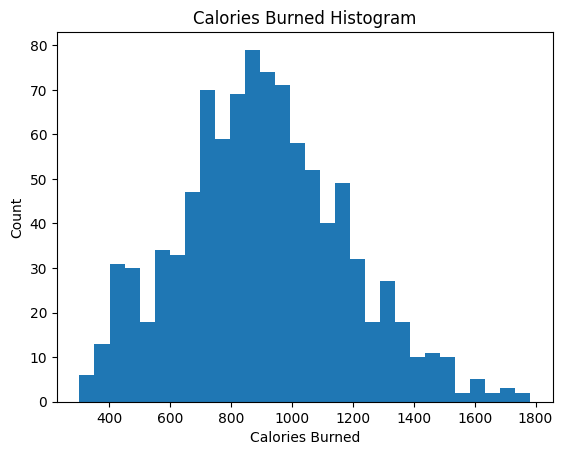

In [14]:
# Lets visualize only calories burned

plt.hist(y, bins=30)
plt.xlabel('Calories Burned')
plt.ylabel('Count')
plt.title('Calories Burned Histogram')
plt.show()

<Axes: >

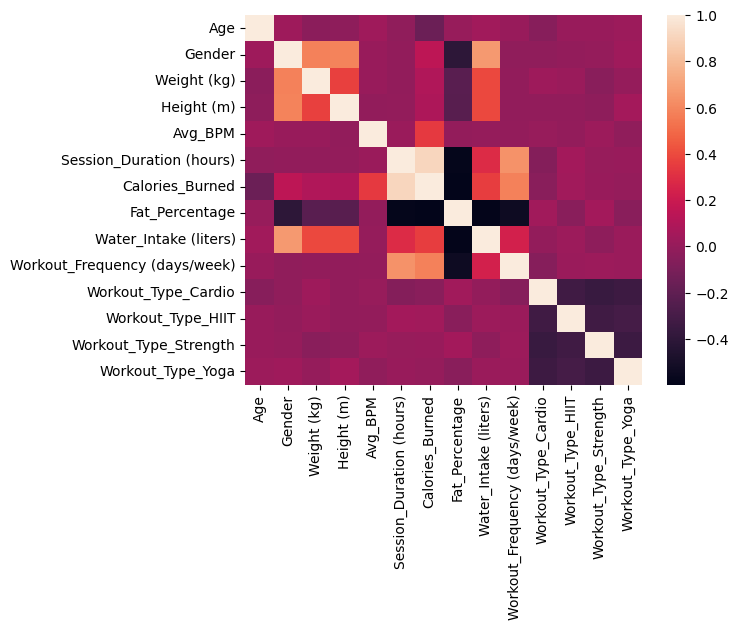

In [20]:
# lets add correlation matrix and heatmap

corr = df.corr()
corr

import seaborn as sns

sns.heatmap(corr, annot=False)